# Tools

In [1]:
import os, sys

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
%matplotlib notebook

In [21]:
import waveprop, imp
imp.reload(waveprop)

<module 'waveprop' from '/home/97n/dv/sts/cupi2d/waveprop.py'>

# Setup

In [5]:
grPeriod = 4.8e-6
np_gr = 48 # number of points within the grating period

npoints = 2**12
Lx = Ly = npoints*grPeriod/np_gr
#Lx = Ly = 409.6e-6

print('Lx = {:.3f} um'.format(Lx*1e6))
print('npoints period = {:d}'.format(np_gr))
print('npoints total = {:d}'.format(npoints))
print('grating lateral size = {:.2f} um'.format(grPeriod*np_gr*1e6))

Lx = 409.600 um
npoints period = 48
npoints total = 4096
grating lateral size = 230.40 um


3AA

In [6]:
wavelength = 3.e-10

In [7]:
zt = (grPeriod/2)**2/wavelength
Y, X = np.mgrid[-Lx/2:Lx/2:1j*npoints, -Lx/2:Lx/2:1j*npoints] # xy grid

tabloid distance

In [8]:
zt

0.0192

# Beam 1 Plane wave

In [9]:
sigma_x = 1e-3; sigma_y = 1e-3
emSource = ((1j)*X*0.0 +1.0)*np.exp(-X**2/sigma_x**2 - Y**2/sigma_y**2)
sourceStr = 'planeWave'

<IPython.core.display.Javascript object>


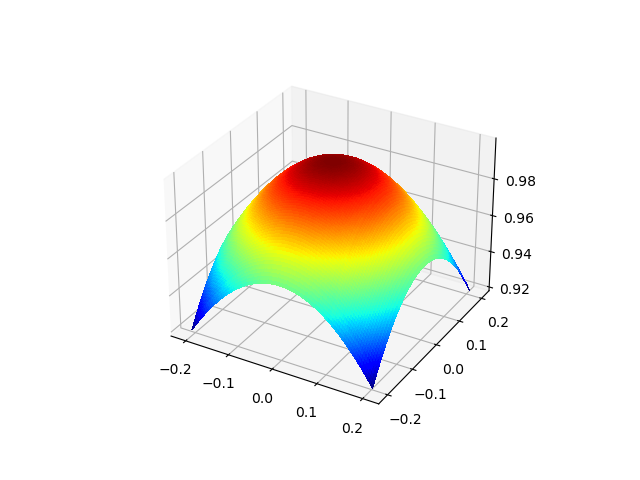

In [10]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(
    X*1e3, Y*1e3, np.abs(emSource),
    rstride=npoints//100, cstride=npoints//100,
    cmap='jet',
    linewidth=0, antialiased=False)

# Grating

In [28]:
print(npoints)
checkerboard = waveprop.dummy_images(
    'Checked', shape=(npoints, npoints),
    nLinesH=int(Lx//grPeriod), nLinesV=int(Lx//grPeriod))

gr = np.exp(-1j*np.pi*checkerboard) # Pi phase grating
#gr = np.exp(-1j*np.pi/3*checkerboard) # Pi/2 phase grating
#gr[gr<0.1] = 0.1 + 0j
marginx = (npoints - gr.shape[0])//2
marginy = (npoints - gr.shape[1])//2

gr = np.pad(gr, ((marginx, marginx),
                 (marginy, marginy)), mode='constant', constant_values=(1,))
gr = np.pad(gr, ((0, npoints - gr.shape[0]),
                 (0, npoints - gr.shape[1])), mode='constant', constant_values=(1,))
gr.shape

4096


(4096, 4096)

<IPython.core.display.Javascript object>


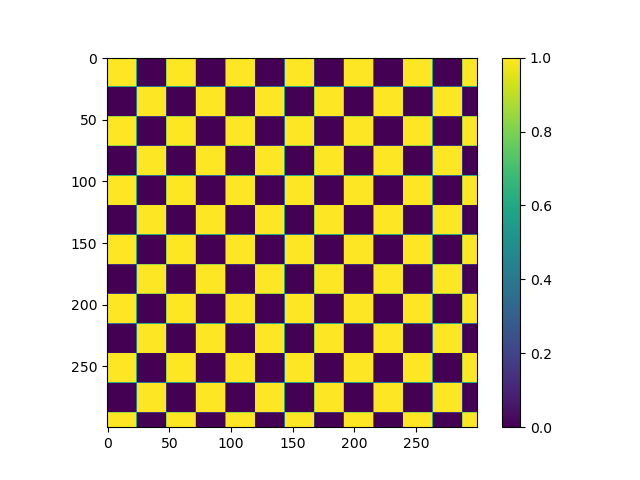

In [29]:
plt.figure()
plt.imshow(checkerboard[:300, :300])
plt.colorbar()

# Propagation

In [14]:
nTalbot = 3

In [15]:
zz = np.round(zt*(nTalbot-1/2), 3) 

In [18]:
waveprop.fresnelNumber(grPeriod, zz, wavelength, verbose=True)

Nf = 1.6
Conditions:
Nf << 1 Fraunhofer regime;
Nf >> 1 Geometric Optic;
Nf -> 1 Fresnel Difraction.


1.5999999999999999

In [19]:
d_sample_gr = 3.

In [22]:
%%time
em_b4_gr = waveprop.propTF_RayleighSommerfeld(emSource, Lx, Ly, wavelength, d_sample_gr)

Propagation Using RayleighSommerfeld TF
CPU times: user 6.54 s, sys: 273 ms, total: 6.82 s
Wall time: 6.82 s


In [30]:
after_grating = em_b4_gr * gr

<IPython.core.display.Javascript object>


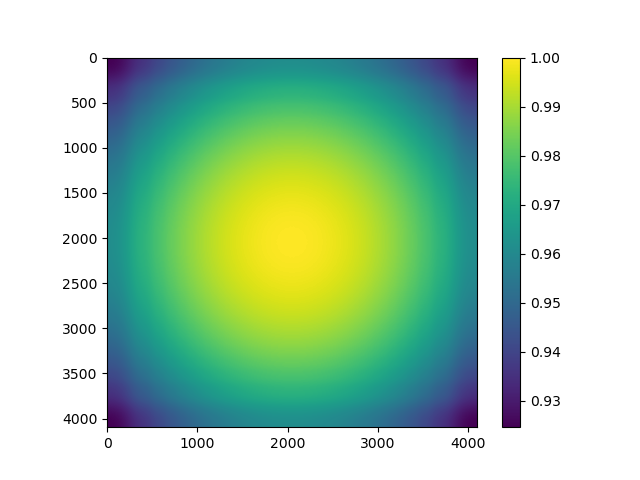

In [31]:
plt.figure()
plt.imshow(np.abs(after_grating))
plt.colorbar()

In [32]:
%%time
u2_xy = waveprop.propTF_RayleighSommerfeld(after_grating,Lx,Ly,wavelength,zz)

Propagation Using RayleighSommerfeld TF
CPU times: user 6.6 s, sys: 236 ms, total: 6.83 s
Wall time: 6.83 s


<IPython.core.display.Javascript object>


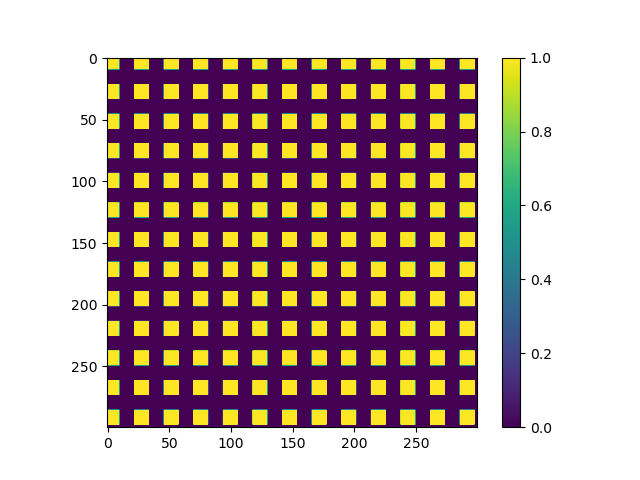

In [35]:
plt.figure()
plt.imshow(np.abs(u2_xy)[1000:1300, 1000:1300])
plt.colorbar()
plt.clim(0,1)

<IPython.core.display.Javascript object>


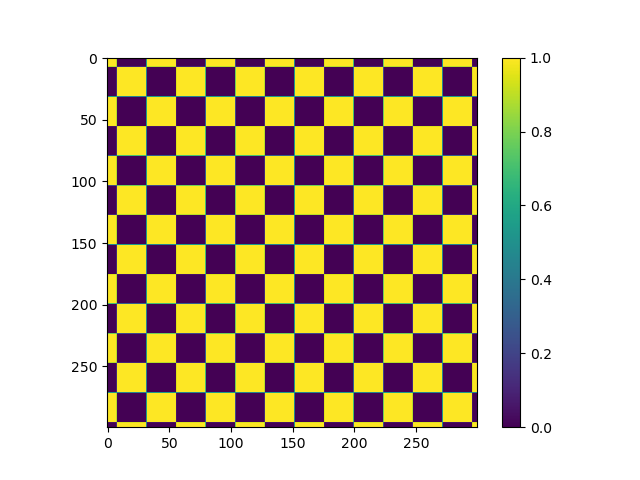

In [41]:
plt.figure()
plt.imshow(checkerboard[1000:1300, 1000:1300])
plt.colorbar()
plt.clim(0,1)